In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split 
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


In [3]:
from pandas import ExcelWriter
from pandas import ExcelFile

dataset = pd.read_excel('teste.xlsx').dropna()

print("Column headings:")
print(dataset.columns)


Column headings:
Index(['Region', 'Crop', 'Category', 'Total_storage', 'Total_loss'], dtype='object')


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

dataset['Region']= label_encoder.fit_transform(dataset['Region'])
dataset['Region'].unique()

dataset['Crop']= label_encoder.fit_transform(dataset['Crop'])
dataset['Crop'].unique()

dataset['Category']= label_encoder.fit_transform(dataset['Category'])
dataset['Category'].unique()

dataset = dataset[(dataset[["Total_storage", "Total_loss"]] != 0).all(axis=1)]
dataset[~(dataset == 0).all(axis=1)]
attributes = ["Region", "Crop", "Category","Total_storage"]


In [5]:
print(dataset[60:100])

     Region  Crop  Category  Total_storage  Total_loss
66        5    17         5           87.0         478
67        5    17         5           12.0           5
70        5    20         2           48.0         162
71        5    20         2            9.0           2
72        5    22         0          155.0         821
73        5    22         0            3.0          57
74        5    23         2           47.0        1023
75        5    23         2            4.0          15
76        5    27         4            1.0         494
77        5    27         4            2.0          14
78        5    33         1           35.0         726
79        5    33         1            5.0           1
80        5    29         0          194.0         464
81        5    29         0           14.0          16
82        5    31         5           37.0         719
83        5    31         5            2.0           7
84        5    41         5          159.0        1065
85        

In [6]:
print(attributes)

['Region', 'Crop', 'Category', 'Total_storage']


In [7]:
print(dataset.shape)


(403, 5)


In [8]:
print(dataset.head(60))

    Region  Crop  Category  Total_storage  Total_loss
0        2    33         1            6.0         604
1        2    33         1            2.0          74
2        2     5         5          295.0        1091
3        2     5         5            6.0          12
4        2    14         2          326.0         735
5        2    14         2            3.0           4
6        2    10         0          156.0        1009
7        2    10         0            3.0          16
8        5     4         3           55.0         315
9        5     4         3           11.0           8
10       2    27         4           13.0         777
11       2    27         4            8.0          59
12       2     7         5          303.0        1123
13       2     7         5            7.0          13
14       2    17         5          242.0         844
15       2    17         5            1.0           8
16       2    24         2           72.0         153
17       2    24         2  

In [9]:
print(dataset.describe())

           Region        Crop    Category  Total_storage   Total_loss
count  403.000000  403.000000  403.000000     403.000000   403.000000
mean     6.188586   22.208437    2.789082      57.578164   316.062035
std      4.046886   12.837532    1.937501      92.416996   385.733073
min      0.000000    0.000000    0.000000       1.000000     1.000000
25%      3.000000   11.000000    1.000000       4.000000    12.000000
50%      6.000000   22.000000    3.000000      13.000000    49.000000
75%     10.000000   33.000000    5.000000      76.500000   605.500000
max     13.000000   43.000000    5.000000     754.000000  1948.000000


In [10]:
print(dataset.groupby('Total_loss').size())

Total_loss
1       14
2        6
3        6
4       11
5        5
        ..
1316     1
1351     1
1547     1
1834     1
1948     1
Length: 217, dtype: int64


## **Boxplot**

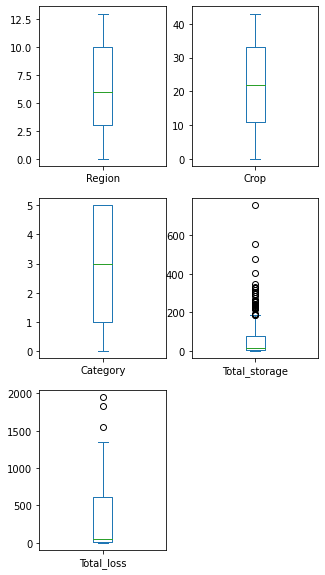

In [11]:
dataset.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(3,2), figsize=(5,10))
plt.show()

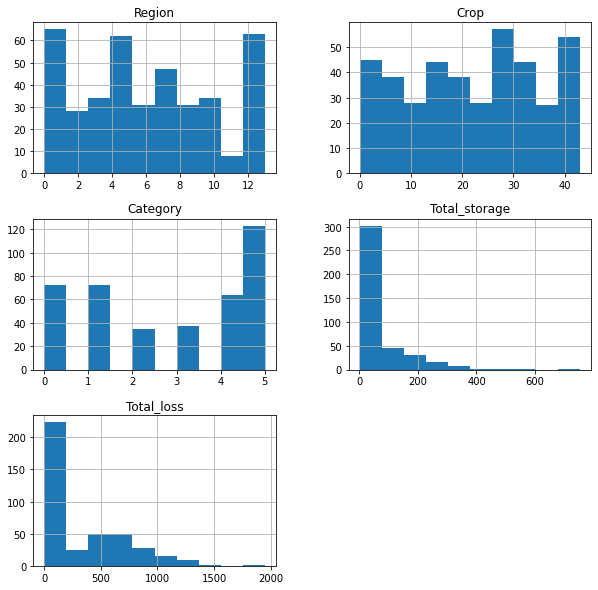

In [12]:
dataset.hist(figsize=(10,10))
plt.show()

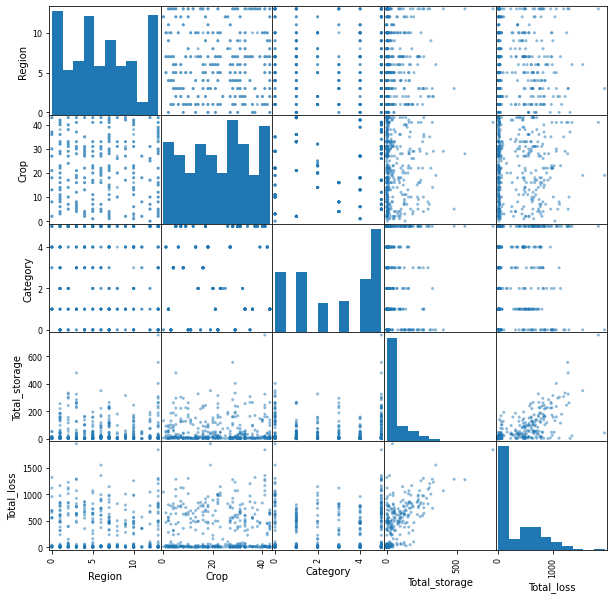

In [13]:
pd.plotting.scatter_matrix(dataset,figsize=(10,10) )
plt.show()

# **DecisionTree**

In [14]:
X=dataset[attributes]
Y=dataset['Total_loss']
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.3)


In [15]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
y_pred = modelo.predict(x_teste)
print("Accuracy:",metrics.accuracy_score(y_teste, y_pred))

Accuracy: 0.008264462809917356


In [16]:
print (y_pred)

[ 821    8  659   17   46    3  676   13  624  227  901  352  394    6
  316    8    3 1123    4  451   29   18   22    7   21  659   37  772
  394 1316  394    7   12   63  857   31   13  821  625    6   13  617
  961  257    4  901    4  469   18  544   13    8   31   15   63  257
  475  461    6    9   15    2  625    6  737    7  311   11   14  658
    2   37 1039    1  504  747   17  682  376  617  803    9  268  617
   13  383  689  682  639   46   15  857   74  369    9  494   55    1
   32   17   17   92   18    6   11  354    8    7  682   14  504   57
   63  638   12  526   14  496   17   13    6]


# **K-means não supervisionado**

[[  14.69827586   27.84051724]
 [  77.09016393  565.02459016]
 [ 212.02040816 1060.83673469]]


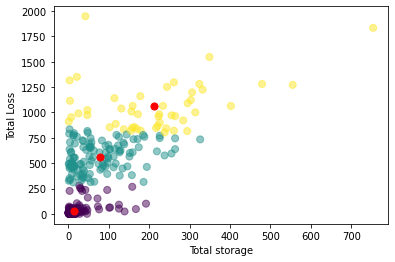

In [23]:
from sklearn.cluster import KMeans
from pandas import DataFrame
df=DataFrame(dataset,columns=['Total_storage','Total_loss'])
kmeans=KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Total_storage'], df['Total_loss'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("Total storage")
plt.ylabel("Total Loss")
plt.show()

Text(0, 0.5, 'WCSS')

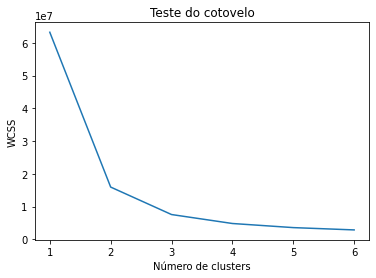

In [18]:
wcss=[]
for i in range(1,7):
  kmeans2 = KMeans(i)
  kmeans2.fit(df)
  wcss_iter = kmeans2.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('Teste do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [19]:
# from yellowbrick.cluster import KElbowVisualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
# visualizer.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_treino, y_treino)
y_pred = knn.predict(x_teste)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_teste, y_pred))


[ 316    8  544    8   46    1   92   62   11    2  817    1   46    1
  316   29    1  817    1   22    1   62    3    7    2   27    1    9
   25    3   53    7    3    1  577    1    1 1064  237   16    2  316
  316    2    4 1064    4  461   18  544    1   16   23   17    8    2
    8   92    1    1    1    1   92   12  268    7    1    1    4  577
  497    8   13    1   13   46    1   46  237  577  383    6  383  383
   13  383  237  394  577    1   15  817    1   54    9    1    1    6
    1    9    1   46    1    4    6    2   11    7   67    7   61   31
   13  237    6   27    7    1    2    2    2]
Accuracy: 0.008264462809917356


# **RandomForest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.model_selection import GridSearchCV

In [22]:
rfc = RandomForestClassifier()
rfc.fit(x_treino, y_treino)
y_pred=modelo.predict(x_teste)
print(y_pred)
print(accuracy_score(y_teste,y_pred))


[ 821    8  659   17   46    3  676   13  624  227  901  352  394    6
  316    8    3 1123    4  451   29   18   22    7   21  659   37  772
  394 1316  394    7   12   63  857   31   13  821  625    6   13  617
  961  257    4  901    4  469   18  544   13    8   31   15   63  257
  475  461    6    9   15    2  625    6  737    7  311   11   14  658
    2   37 1039    1  504  747   17  682  376  617  803    9  268  617
   13  383  689  682  639   46   15  857   74  369    9  494   55    1
   32   17   17   92   18    6   11  354    8    7  682   14  504   57
   63  638   12  526   14  496   17   13    6]
0.008264462809917356
